In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [ ]:
import os

path = os.getcwd()

print(path)


/content


In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
df.shape

(6819, 96)

In [ ]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

number of observations: 6819

number of features: 96

In [ ]:
print(df['Bankrupt?'].value_counts())

0    6599
1     220
Name: Bankrupt?, dtype: int64


6599 non-bankrupt

220 bankrupt

In [ ]:
duplicates = df.duplicated()
print("# of duplicates: ", len(df[duplicates]))

# of duplicates:  0


In [ ]:
missing_values = pd.DataFrame(df.isnull().sum())
missing_values.columns = ['Count']
print("# of columns with missing values :", sum(missing_values['Count'] > 0))

# of columns with missing values : 0


In [ ]:
"""corr_df = df.corr(method = 'pearson')
corr_df = corr_df[abs(corr_df['Bankrupt?']) <= 0.10]

plt.figure(figsize = (8,10))
sns.barplot(y =corr_df.index, x = abs(corr_df['Bankrupt?']))"""

"corr_df = df.corr(method = 'pearson')\ncorr_df = corr_df[abs(corr_df['Bankrupt?']) <= 0.10]\n\nplt.figure(figsize = (8,10))\nsns.barplot(y =corr_df.index, x = abs(corr_df['Bankrupt?']))"

Split data into test and train:

In [ ]:
X = df.drop(['Bankrupt?'],axis=1)
y = df['Bankrupt?']

In [ ]:
X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

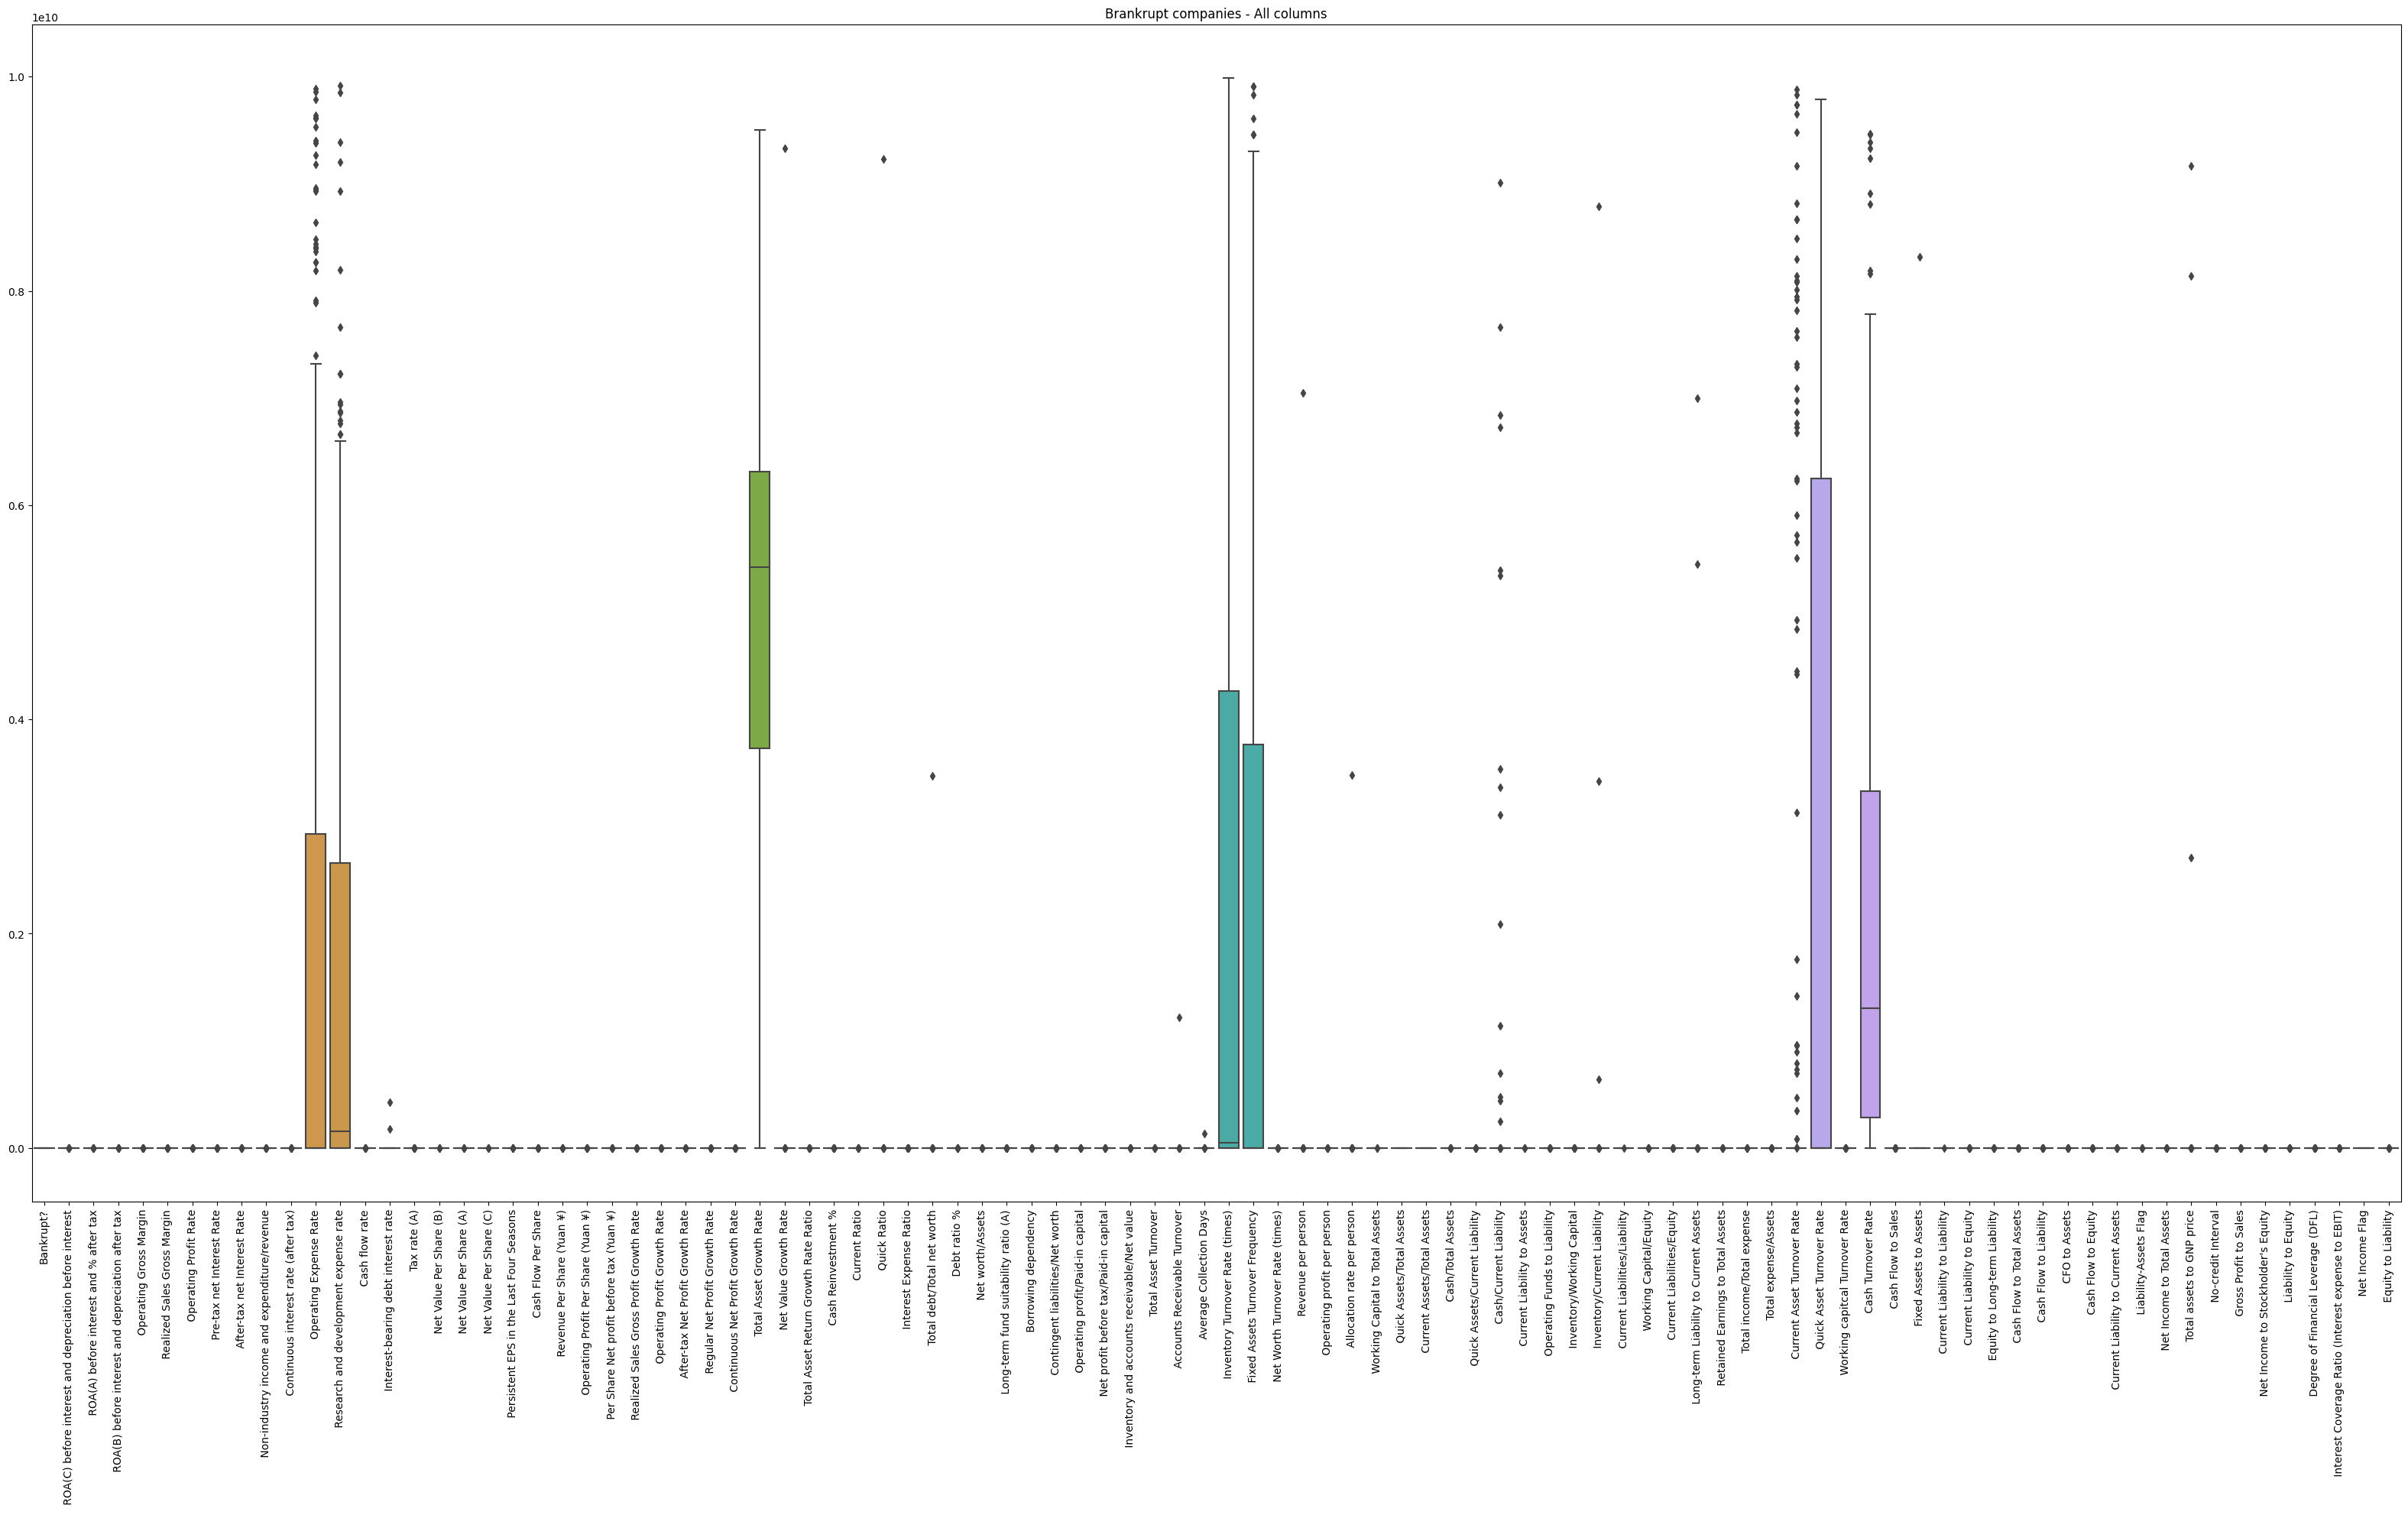

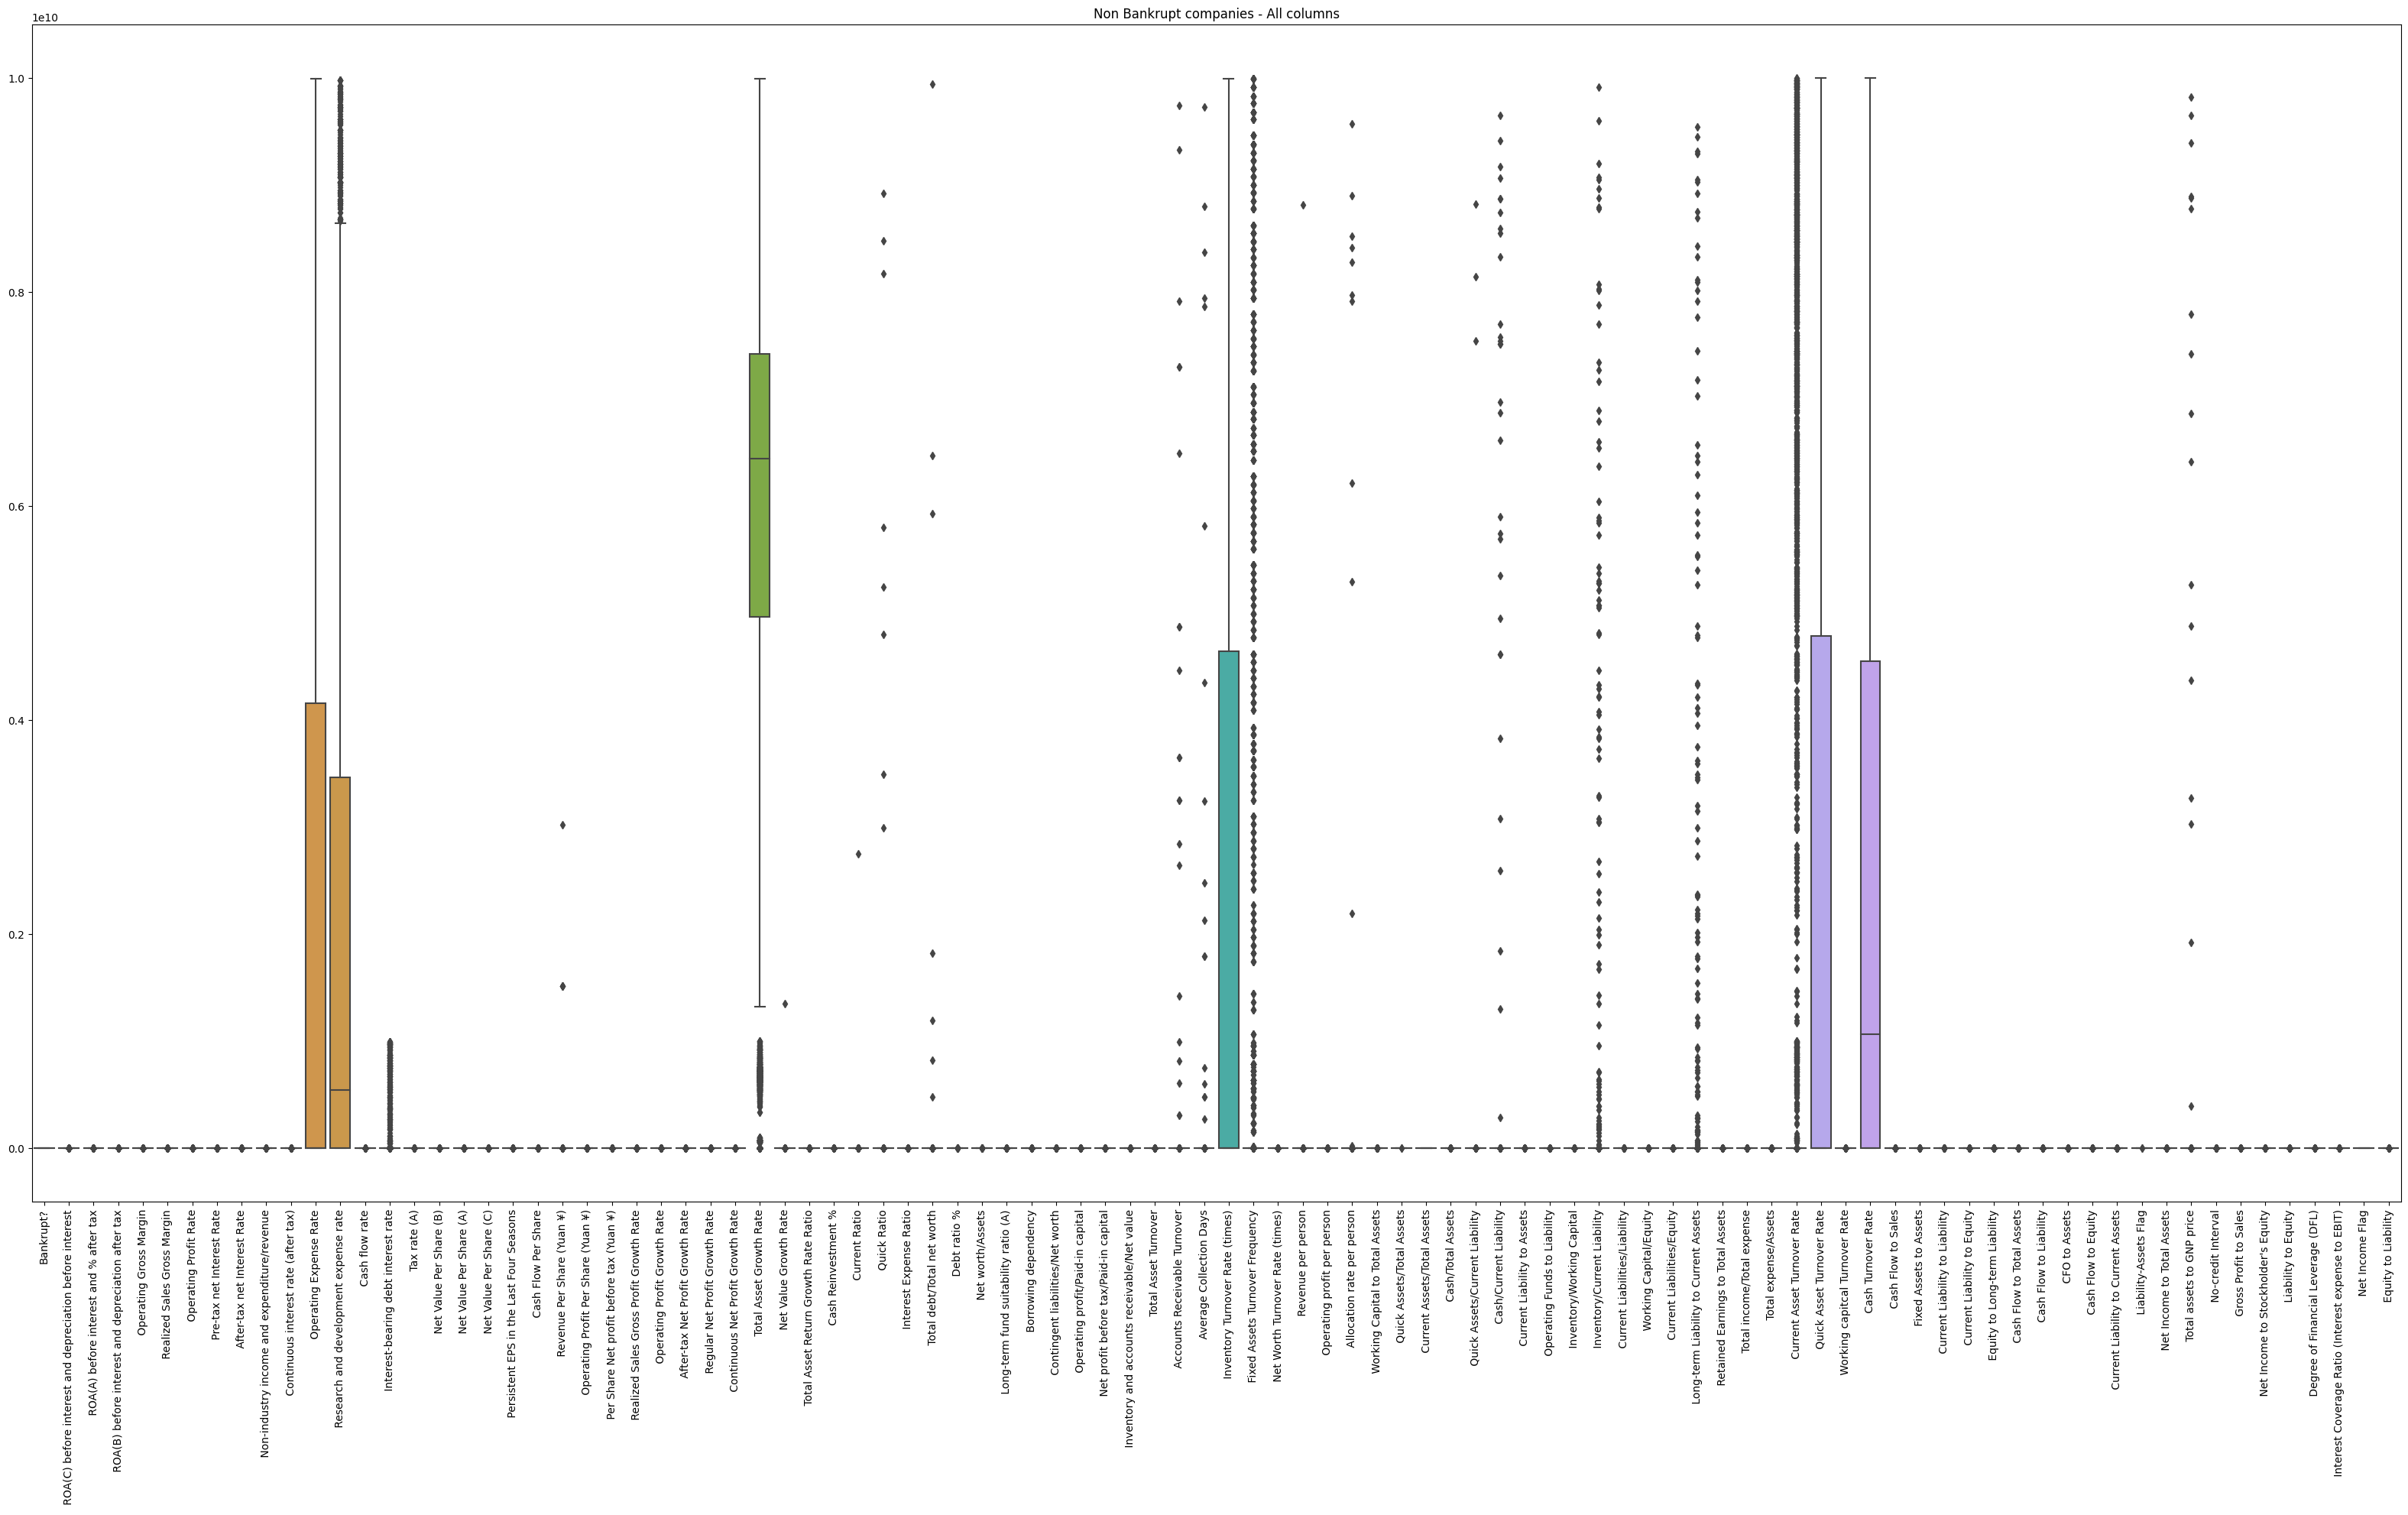

In [ ]:
bankrupt = df[df['Bankrupt?'] == 1]
not_bankrupt = df[df['Bankrupt?'] == 0]

plt.figure(figsize=(40, 20))
sns.boxplot(data=bankrupt)
plt.xticks(rotation=90)
plt.title("Brankrupt companies - All columns")
plt.show()

plt.figure(figsize=(40, 20))
sns.boxplot(data=not_bankrupt)
plt.xticks(rotation=90)
plt.title("Non Bankrupt companies - All columns")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train1 = ss.transform(X_train)
X_test1 = ss.transform(X_test)

In [ ]:
from sklearn.svm import SVC
#svm base model creation
svm_base_model = SVC(probability = True)
#training svm base
svm_base_model.fit(X_train1,y_train)

SVC(probability=True)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, roc_auc_score

y_pred = svm_base_model.predict(X_test1)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred)

base_performance_metrics = {
    "precision":precision,
    "recall":recall,
    "accuracy":accuracy,
    "roc auc": roc_auc
}

print(base_performance_metrics)

{'precision': 0.0, 'recall': 0.0, 'accuracy': 0.967741935483871, 'roc auc': 0.5}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
counts = np.unique(y_pred, return_counts=True)
print(counts)

(array([0]), array([2046]))


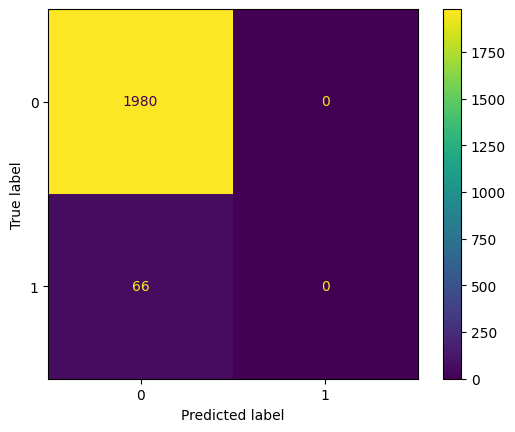

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmplot = ConfusionMatrixDisplay(cm)
cmplot.plot()

# Upsampling then applying PCA to data

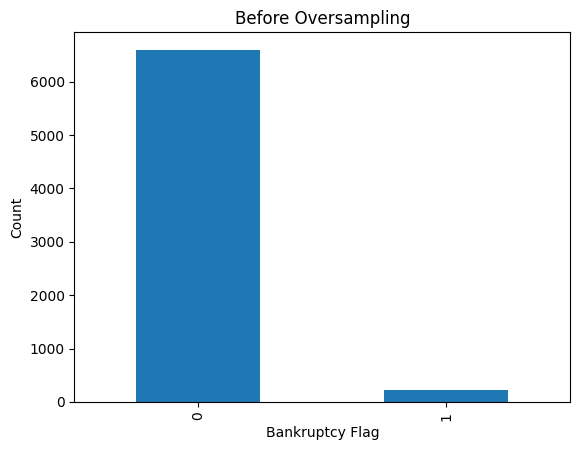

In [ ]:
# Before Oversampling using SMOTE
df['Bankrupt?'].value_counts().plot(kind="bar")
plt.xlabel("Bankruptcy Flag")
plt.ylabel("Count")
plt.title("Before Oversampling")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Lets oversample our dataset using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

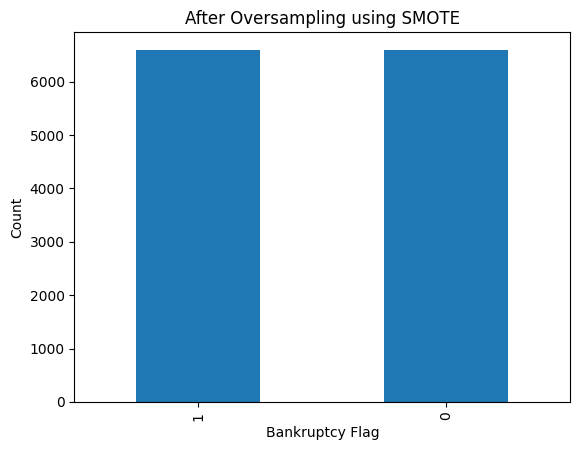

In [ ]:
# After Oversampling using SMOTE
y_resampled.value_counts().plot(kind="bar")
plt.xlabel("Bankruptcy Flag")
plt.ylabel("Count")
plt.title("After Oversampling using SMOTE")
plt.show()

In [ ]:
# split data into train and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

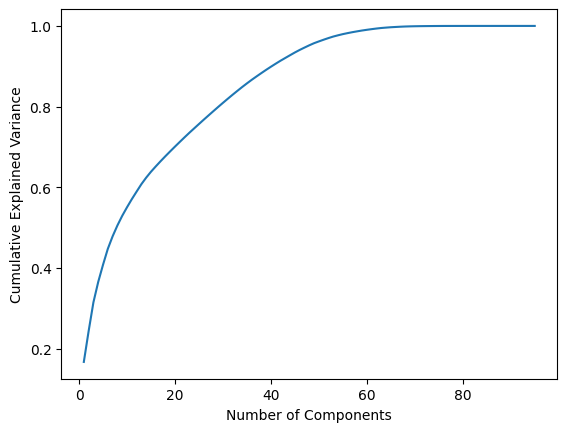

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Feature Standardization
scaler = StandardScaler()
X_train_2_scaled = scaler.fit_transform(X_train_2)
X_test_2_scaled = scaler.fit_transform(X_test_2)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_2_scaled)
X_test_pca = pca.fit_transform(X_test_2_scaled)


# Determine the Number of Components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
# Determine the number of components to retain based on the plot
desired_variance = 0.95  # Set the desired cumulative explained variance
n_components = np.argmax(cumulative_explained_variance >= desired_variance) + 1
print("Number of components to retain:", n_components)

Number of components to retain: 48


In [ ]:
# Reduce Dimensionality
X_train_resampled_reduced = X_train_pca[:, :n_components]
X_test_resampled_reduced = X_test_pca[:, :n_components]

In [ ]:
X_train_2_scaled.shape

(9238, 95)

In [ ]:
X_train_resampled_reduced.shape

(9238, 48)

In [ ]:
# Train the SVM model on the training data with upsampling and PCA applied
svm_model_2 = SVC(kernel='linear', probability = True)

svm_model_2.fit(X_train_resampled_reduced, y_train_2)


SVC(kernel='linear', probability=True)

In [ ]:
# Evaluate Model Performance
y_pred_2 = svm_model_2.predict(X_test_resampled_reduced)

precision = precision_score(y_test_2,y_pred_2)
recall = recall_score(y_test_2,y_pred_2)
accuracy = accuracy_score(y_test_2,y_pred_2)
f1=f1_score(y_test_2, y_pred_2)
roc_auc = roc_auc_score(y_test_2, y_pred_2)

second_performance_metrics = {
    "precision":precision,
    "recall":recall,
    "accuracy":accuracy,
    "f1":f1,
    "roc auc": roc_auc
}

print(second_performance_metrics)

{'precision': 0.6820461384152458, 'recall': 0.6956521739130435, 'accuracy': 0.6896464646464646, 'f1': 0.6887819701190175, 'roc auc': 0.6897213488019083}


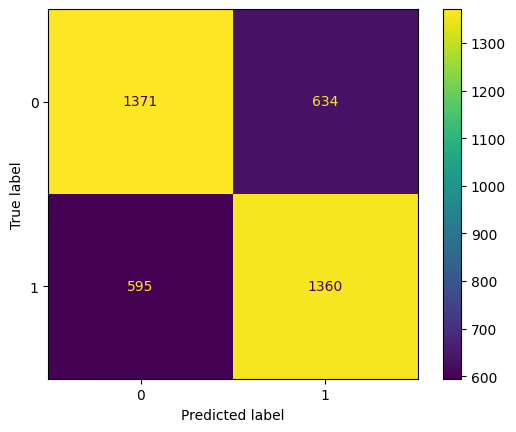

In [ ]:
cm_pca_resampled = confusion_matrix(y_test_2, y_pred_2)
cmplot_pca_resampled = ConfusionMatrixDisplay(cm_pca_resampled)
cmplot_pca_resampled.plot()

<Axes: >

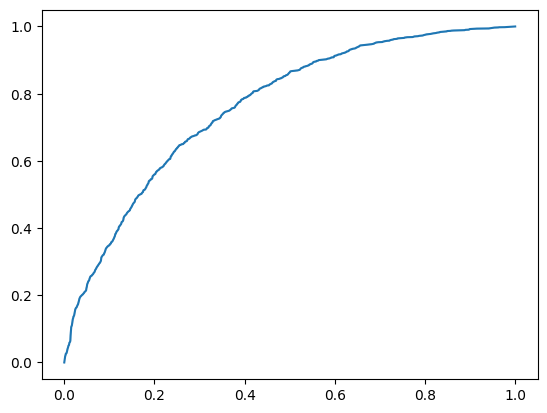

In [ ]:
pred_prob2 = svm_model_2.predict_proba(X_test_resampled_reduced)
fpr2, tpr2, thresh2 = roc_curve(y_test_2, pred_prob2[:,1], pos_label=1)
sns.lineplot(x=fpr2, y=tpr2)

# Gridsearch for SVM best params

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

impute = SimpleImputer()
svc = SVC(probability=True)

params = {'svc__C':[1,5, 10],
          'svc__kernel':['linear','rbf', 'poly','sigmoid'],
          'svc__class_weight':[None,'balanced'],
         'svc__max_iter':[1,-1],
         'imputer__strategy':['mean','median','most_frequent']}

pipe = Pipeline(steps=[("imputer", impute),("svc", svc)])
gs = GridSearchCV(pipe, param_grid = params, verbose = 3, refit = True)
gs.fit(X_train_resampled_reduced, y_train_2)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.0s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.0s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time=  18.5s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.898 total time=  19.5s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time=  18.1s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.906 total time=  20.0s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  20.1s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.601 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.606 total time=   0.0s
[CV 3/5] END imputer_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.629 total time=   0.1s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.650 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.936 total time=   6.6s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.929 total time=   7.4s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.930 total time=   7.3s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.941 total time=   7.6s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.940 total time=   8.2s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.499 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.499 total time=   0.0s
[CV 3/5] END imputer__strategy=mea

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.497 total time=   0.0s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.907 total time=  10.9s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.899 total time=  12.6s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.891 total time=  10.7s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.909 total time=  11.7s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.912 total time=  11.9s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   0.0s
[CV 2/5] END imputer__stra

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   4.2s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.851 total time=   4.8s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   3.9s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.860 total time=   4.1s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.872 total time=   4.8s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.0s
[C

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.898 total time=  18.6s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time=  20.7s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.893 total time=  18.4s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  19.4s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  19.2s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.497 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.497 total time= 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.936 total time=   7.6s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.929 total time=   7.4s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.930 total time=   6.8s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.941 total time=   7.9s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.940 total time=   7.7s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.546 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.518 total time=   0.0s
[CV 3/

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.909 total time=  11.3s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.899 total time=  12.2s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.891 total time=  11.3s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.909 total time=  12.2s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.913 total time=  12.2s
[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.850 total time=   4.4s
[CV 2/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   5.0s
[CV 3/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   4.1s
[CV 4/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.861 total time=   4.4s
[CV 5/5] END imputer__strategy=mean, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.871 total time=   4.8s
[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total tim

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.895 total time=  56.8s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.899 total time=  59.0s
[CV 3/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time=  56.5s
[CV 4/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  57.0s
[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.906 total time=  57.5s
[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 3/5] END imputer_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   6.2s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.956 total time=   5.9s
[CV 3/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.951 total time=   5.8s
[CV 4/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.964 total time=   6.4s
[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.963 total time=   5.8s
[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.1s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.525 total time=   0.0s
[CV 3/5] END imputer__strategy=mea

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.497 total time=   0.0s
[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.934 total time=   8.5s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   9.4s
[CV 3/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.917 total time=   8.2s
[CV 4/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.931 total time=   9.1s
[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.940 total time=   9.5s
[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   0.0s
[CV 2/5] END imputer__stra

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.848 total time=   3.8s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   4.6s
[CV 3/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   3.6s
[CV 4/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.858 total time=   3.7s
[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.869 total time=   4.7s
[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.0s
[C

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time=  58.0s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.900 total time= 1.0min
[CV 3/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time=  57.2s
[CV 4/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.906 total time=  59.1s
[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.0min
[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time= 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   6.7s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.957 total time=   5.6s
[CV 3/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.950 total time=   6.6s
[CV 4/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.964 total time=   5.8s
[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.963 total time=   6.8s
[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.525 total time=   0.0s
[CV 3/

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.935 total time=   9.3s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.931 total time=   8.9s
[CV 3/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.918 total time=   9.2s
[CV 4/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   9.6s
[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.939 total time=   9.3s
[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.601 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.611 total time=   

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.614 total time=   0.1s
[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.848 total time=   4.2s
[CV 2/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.851 total time=   4.0s
[CV 3/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   4.6s
[CV 4/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.859 total time=   4.0s
[CV 5/5] END imputer__strategy=mean, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.868 total time=   3.9s
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total t

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.895 total time= 1.7min
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.899 total time= 1.7min
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time= 1.8min
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.7min
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.8min
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 3/5] END i

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.968 total time=   6.2s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.963 total time=   5.3s
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   6.2s
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.969 total time=   5.4s
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.971 total time=   6.1s
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.525 total time=   0.1s
[CV 3/5] END imputer__strat

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.945 total time=   7.5s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.934 total time=   8.4s
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   7.4s
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.944 total time=   8.6s
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.946 total time=   8.7s
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.594 total time=   0.0s
[CV 2/5] END impute

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.847 total time=   3.7s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.851 total time=   3.8s
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   4.6s
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.860 total time=   3.8s
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.868 total time=   3.7s
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time= 1.8min
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.899 total time= 1.7min
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time= 1.7min
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.7min
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.8min
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.0s
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.558 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.968 total time=   5.9s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.962 total time=   5.4s
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   6.3s
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.969 total time=   5.5s
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.971 total time=   6.4s
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.525 total time=   0.0s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.945 total time=   7.9s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.934 total time=   8.7s
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   8.6s
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.943 total time=   8.1s
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.946 total time=   8.8s
[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.594 total time=   0.0s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.580 total t

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing

[CV 1/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.848 total time=   4.5s
[CV 2/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.850 total time=   4.9s
[CV 3/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   3.7s
[CV 4/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.859 total time=   4.4s
[CV 5/5] END imputer__strategy=mean, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.868 total time=   4.0s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time=  18.5s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.898 total time=  20.0s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time=  18.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.906 total time=  19.4s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  18.6s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.601 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.606 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.608 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.629 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.650 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.936 total time=   7.4s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.929 total time=   6.9s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.930 total time=   6.9s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.941 total time=   7.6s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.940 total time=   6.6s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.499 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.499 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.498 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.504 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.497 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.907 total time=  11.3s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.899 total time=  11.6s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.891 total time=  10.6s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.909 total time=  11.6s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.912 total time=  12.7s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.502 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.499 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.670 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.609 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   4.0s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.851 total time=   4.3s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   4.7s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.860 total time=   4.1s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.872 total time=   4.6s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total t

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.898 total time=  19.3s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time=  20.0s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.893 total time=  18.4s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  19.8s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  19.1s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.936 total time=   7.7s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.929 total time=   6.7s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.930 total time=   7.6s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.941 total time=   7.2s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.940 total time=   7.5s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.546 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.518 total time=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.515 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.508 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.909 total time=  11.5s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.899 total time=  12.4s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.891 total time=  12.3s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.909 total time=  12.3s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.913 total time=  12.3s
[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.498 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.496 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.850 total time=   4.4s
[CV 2/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   5.2s
[CV 3/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   4.2s
[CV 4/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.861 total time=   4.2s
[CV 5/5] END imputer__strategy=median, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.871 total time=   5.1s
[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.895 total time=  58.4s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.899 total time=  57.8s
[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time= 1.0min
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.1min
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.906 total time=  58.2s
[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.650 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   6.6s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.956 total time=   5.6s
[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.951 total time=   6.7s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.964 total time=   5.9s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.963 total time=   7.7s
[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.525 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.497 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.934 total time=   7.8s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   9.3s
[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.917 total time=   8.9s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.931 total time=   8.9s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.940 total time=   8.8s
[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.502 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.499 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.670 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.609 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.848 total time=   4.7s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   3.7s
[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   3.7s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.858 total time=   4.5s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.869 total time=   3.8s
[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total t

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time= 1.0min
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.900 total time=  57.4s
[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time=  58.6s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.906 total time=  57.0s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  58.8s
[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   6.0s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.957 total time=   6.4s
[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.950 total time=   6.1s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.964 total time=   6.8s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.963 total time=   7.2s
[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.525 total time=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.935 total time=   9.3s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.931 total time=   9.2s
[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.918 total time=   9.2s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   9.7s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.939 total time=   9.9s
[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.601 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.611 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.602 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.614 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.848 total time=   4.2s
[CV 2/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.851 total time=   3.9s
[CV 3/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   4.6s
[CV 4/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.859 total time=   3.9s
[CV 5/5] END imputer__strategy=median, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.868 total time=   4.0s
[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.895 total time= 1.7min
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.899 total time= 1.7min
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time= 1.7min
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.7min
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.8min
[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.650 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.968 total time=   6.6s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.963 total time=   5.3s
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   6.3s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.969 total time=   5.5s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.971 total time=   6.4s
[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.525 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.497 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.945 total time=   7.1s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.934 total time=   8.4s
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   8.1s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.944 total time=   7.5s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.946 total time=   8.6s
[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.594 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.580 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.580 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.581 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.609 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.847 total time=   3.8s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.851 total time=   4.4s
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   3.7s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.860 total time=   3.7s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.868 total time=   4.7s
[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time= 1.7min
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.899 total time= 1.7min
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time= 1.8min
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.7min
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.8min
[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, sco

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.558 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.968 total time=   5.4s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.962 total time=   6.4s
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   5.4s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.969 total time=   6.5s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.971 total time=   5.5s
[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.1s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.525 tota

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.945 total time=   8.6s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.934 total time=   8.0s
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   8.8s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.943 total time=   9.3s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.946 total time=   8.9s
[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.594 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.580 total time=   0.1s
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.580 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.581 total time=   0.1s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.511 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.848 total time=   4.1s
[CV 2/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.850 total time=   3.9s
[CV 3/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   4.5s
[CV 4/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.859 total time=   3.9s
[CV 5/5] END imputer__strategy=median, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.868 total time=   4.0s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__m

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time=  19.4s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.898 total time=  18.8s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time=  19.4s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.906 total time=  18.8s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  20.1s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.601 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__ma

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.608 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.629 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.650 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.936 total time=   7.7s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.929 total time=   7.3s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.930 total time=   7.0s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.941 total time=   6.9s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.940 total time=   7.5s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.499 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.498 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.504 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.497 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.907 total time=  11.0s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.899 total time=  11.1s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.891 total time=  10.5s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.909 total time=  11.7s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.912 total time=  11.4s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.499 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.670 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.609 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   4.5s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.851 total time=   4.5s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   3.9s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.860 total time=   4.8s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.872 total time=   4.5s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__ker

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.898 total time=  18.9s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time=  20.4s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.893 total time=  18.8s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  19.3s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  20.4s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.936 total time=   6.8s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.929 total time=   8.8s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.930 total time=   6.6s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.941 total time=   7.9s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.940 total time=   7.6s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.546 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.518 total time=   0.1s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.515 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.508 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.909 total time=  10.6s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.899 total time=  12.1s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.891 total time=  11.3s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.909 total time=  12.2s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.913 total time=  12.1s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, sv

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.498 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.496 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.850 total time=   5.3s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   4.5s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   4.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.861 total time=   4.9s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=1, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.871 total time=   4.2s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=No

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.895 total time=  58.0s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.899 total time=  58.0s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time=  54.5s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  56.8s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.906 total time= 1.0min
[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__ma

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.650 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   6.6s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.956 total time=   5.6s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.951 total time=   7.3s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.964 total time=   5.9s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.963 total time=   6.6s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, sc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.497 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.934 total time=   8.4s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   8.4s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.917 total time=   8.5s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.931 total time=   9.4s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.940 total time=   8.2s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.497 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.499 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.670 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.609 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.848 total time=   4.8s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   3.6s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   3.7s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.858 total time=   4.5s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.869 total time=   3.7s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__ker

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time=  59.0s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.900 total time=  56.5s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time=  56.6s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.906 total time=  58.9s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time=  59.9s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   5.7s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.957 total time=   6.5s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.950 total time=   5.9s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.964 total time=   6.3s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.963 total time=   6.2s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kerne

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.935 total time=   9.0s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.931 total time=   9.1s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.918 total time=   9.5s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   9.6s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.939 total time=   8.9s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.601 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.611 total time=   0.1s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.602 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.614 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.848 total time=   4.2s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.851 total time=   3.9s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   4.7s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.859 total time=   4.0s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=5, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.868 total time=   3.9s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.895 total time= 1.6min
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.899 total time= 1.7min
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time= 1.6min
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.7min
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.7min
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=1;, score=0.650 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.968 total time=   6.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.963 total time=   5.4s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   5.4s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.969 total time=   6.2s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=rbf, svc__max_iter=-1;, score=0.971 total time=   5.4s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=1;, score=0.497 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.945 total time=   8.0s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.934 total time=   8.4s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   6.9s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.944 total time=   8.2s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=poly, svc__max_iter=-1;, score=0.946 total time=   8.5s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.594 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.580 total time=   0.1s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.580 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.581 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=1;, score=0.609 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.847 total time=   3.8s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.851 total time=   3.8s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.852 total time=   4.2s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.860 total time=   4.9s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=None, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.868 total time=   3.9s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, s

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=1;, score=0.661 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.896 total time= 1.7min
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.899 total time= 1.7min
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.897 total time= 1.7min
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.7min
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=linear, svc__max_iter=-1;, score=0.905 total time= 1.8min
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.552 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.550 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=1;, score=0.558 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.968 total time=   6.4s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.962 total time=   5.3s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.958 total time=   6.2s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.969 total time=   5.5s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=rbf, svc__max_iter=-1;, score=0.971 total time=   6.0s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.523 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.525 total time=   0.1s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.522 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=1;, score=0.498 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.945 total time=   8.0s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.934 total time=   8.6s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.930 total time=   7.9s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.943 total time=   8.5s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=poly, svc__max_iter=-1;, score=0.946 total time=   9.1s
[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.594 total time=   0.1s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balan

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.580 total time=   0.1s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.581 total time=   0.1s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=1;, score=0.511 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.848 total time=   3.8s
[CV 2/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.850 total time=   4.6s
[CV 3/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.853 total time=   3.9s
[CV 4/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.859 total time=   3.8s
[CV 5/5] END imputer__strategy=most_frequent, svc__C=10, svc__class_weight=balanced, svc__kernel=sigmoid, svc__max_iter=-1;, score=0.868 total time=   4.8s


GridSearchCV(estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'imputer__strategy': ['mean', 'median',
                                               'most_frequent'],
                         'svc__C': [1, 5, 10],
                         'svc__class_weight': [None, 'balanced'],
                         'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'svc__max_iter': [1, -1]},
             verbose=3)

In [ ]:
# Print the best parameters found
print("Best Parameters: ", gs.best_params_)

Best Parameters:  {'imputer__strategy': 'mean', 'svc__C': 10, 'svc__class_weight': None, 'svc__kernel': 'rbf', 'svc__max_iter': -1}


In [ ]:
# Evaluate the model on the test set
best_model = gs.best_estimator_
accuracy = best_model.score(X_test_resampled_reduced, y_test_2)
print("Accuracy on Test Set: ", accuracy)

Accuracy on Test Set:  0.7823232323232323


In [ ]:
y_pred_3 = best_model.predict(X_test_resampled_reduced)

precision = precision_score(y_test_2,y_pred_3)
recall = recall_score(y_test_2,y_pred_3)
accuracy = accuracy_score(y_test_2,y_pred_3)
f1=f1_score(y_test_2, y_pred_3)
roc_auc = roc_auc_score(y_test_2, y_pred_3)

gs_performance_metrics = {
    "precision":precision,
    "recall":recall,
    "accuracy":accuracy,
    "f1":f1,
    "roc auc": roc_auc
}

print(gs_performance_metrics)

{'precision': 0.8024349750968456, 'recall': 0.7416879795396419, 'accuracy': 0.7823232323232323, 'f1': 0.7708665603402446, 'roc auc': 0.7818165583483747}


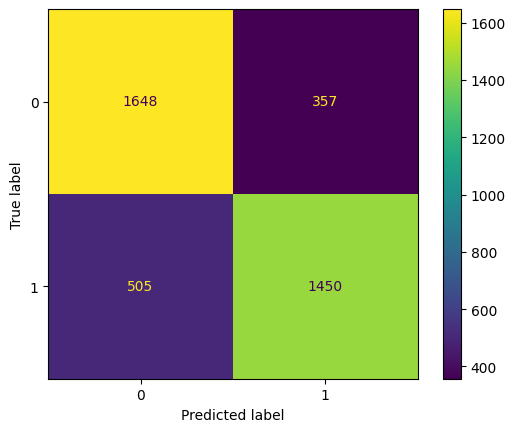

In [ ]:
cmbest = confusion_matrix(y_test_2, y_pred_3)
cmplotbest= ConfusionMatrixDisplay(cmbest)
cmplotbest.plot()

<Axes: >

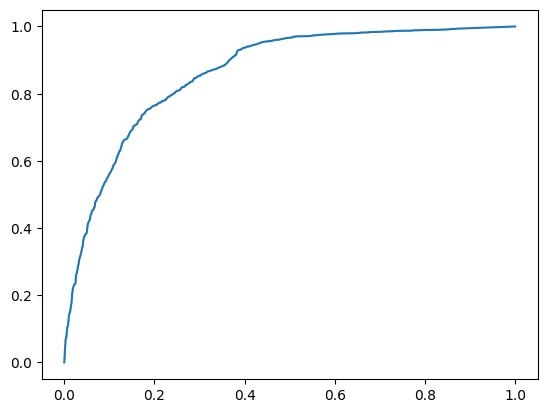

In [ ]:
pred_pro3 = best_model.predict_proba(X_test_resampled_reduced)
fpr3, tpr3, thresh3 = roc_curve(y_test_2, pred_pro3[:,1], pos_label=1)
sns.lineplot(x=fpr3, y=tpr3)